In [ ]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../..'))
	print(os.getcwd())
except:
	pass


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
adults = pd.read_csv("lab_02/data/adult-training.csv",names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'],  
        skipinitialspace = True)
adults_test = pd.read_csv('lab_02/data/adult-training.csv',
    names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'], 
        skipinitialspace = True)



In [3]:
train_data = adults.drop('label',axis=1)

test_data = adults_test.drop('label',axis=1)

data = train_data.append(test_data)

label = adults['label'].append(adults_test['label'])


In [4]:
data.head()


,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
full_dataset = adults.append(adults_test)


In [6]:
data_binary = pd.get_dummies(data)

data_binary.head()


,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_binary,label,)


In [8]:
performance = []

In [9]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression


logClassifier = LogisticRegression()


In [10]:
logClassifier.fit(x_train,y_train)
train_score = logClassifier.score(x_train,y_train)
test_score = logClassifier.score(x_test,y_test)

print(f'LogisticRegression : Training score - {round(train_score,6)} - Test score - {round(test_score,6)}')

performance.append({'algorithm':'LogisticRegression', 'training_score':round(train_score,6), 'testing_score':round(test_score,6)})


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression : Training score - 0.799349 - Test score - 0.794607


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []


KNN : Training score - 1.0 -- Test score - 0.9318223696333149
KNN : Training score - 0.9474621731741775 -- Test score - 0.7758122965419815
KNN : Training score - 0.8639872238488155 -- Test score - 0.8090412136846631
KNN : Training score - 0.8480375094695031 -- Test score - 0.7888336097291321
KNN : Training score - 0.8333981695706476 -- Test score - 0.7972483262698852
KNN : Training score - 0.8279519256362482 -- Test score - 0.7917204102942079
KNN : Training score - 0.8213181548289347 -- Test score - 0.7943001044161907
KNN : Training score - 0.8170184885649352 -- Test score - 0.7928259934893435
KNN : Training score - 0.8148891300341926 -- Test score - 0.7952828450340889
KNN : Training score - 0.8131692635285928 -- Test score - 0.7960199004975125


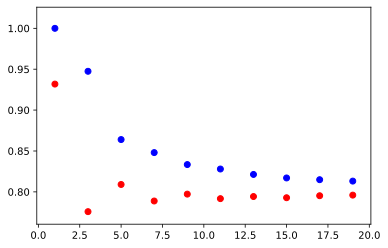

In [12]:

train_scores = []
test_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    train_score = knn.score(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()


In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

knn.score(x_train,y_train)

train_score = knn.score(x_train,y_train)
test_score = knn.score(x_test,y_test)

print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'K Neighbors', 'training_score':train_score, 'testing_score':test_score})


K Neighbors : Training score - 0.8639872238488155 - Test score - 0.8090412136846631
